In [1]:
#Import relevant libraries
import astropy
import numpy as np
import ccdproc
import os
import glob
import matplotlib.pyplot as plt
from astropy.nddata import CCDData

In [2]:
#Reading in image fits file
#biasImg1 = astropy.nddata.CCDData.read('C:/Users/Andres/Desktop/NACHO/UNI/Year 3/Obslab data/obslab/raw/bias/20131220.00000200.bias.fits', unit='adu')
biasImg1 = astropy.nddata.CCDData.read('U:/Lab/Astro/Year 3/Computing Skills/obslab/raw/bias/20131220.00000200.bias.fits', unit='adu')
print(biasImg1)

[[147 125 108 ...  99  99 105]
 [136 121 117 ...  91 121 105]
 [141 116 120 ... 107 105 111]
 ...
 [131 133 123 ... 104 126 120]
 [141 124 124 ...  99 128 124]
 [128 124 125 ... 113 121 109]] adu


In [3]:
#Write out fits file
#hdul = astropy.nddata.CCDData.to_hdu(inputData)
#hdul.writeto('output file name', overwrite=True)

In [4]:
#TASK 1
#Mean and S.D. of individual bias frame
mean1 = np.mean(biasImg1)
stdev1 = np.std(biasImg1)
print(mean1, stdev1)

111.34115219116211 14.561503353266682


In [5]:
#TASK 2
#Create list of bias images
from os import listdir
from os.path import isfile, join
file_location = os.path.join('raw/', 'bias/', '*.fits')
#filenames = glob.glob('C:/Users/Andres/Desktop/NACHO/UNI/Year 3/Obslab data/obslab/raw/bias/*.fits')
filenames = glob.glob('U:/Lab/Astro/Year 3/Computing Skills/obslab/raw/bias/*.fits')
biasimages = []
for file in filenames:
    biasImg = astropy.nddata.CCDData.read(file, unit='adu')
    hdul = astropy.nddata.CCDData.to_hdu(biasImg)
    biasimages.append(biasImg)
#print(biasimages)


In [6]:
#Combine bias images into master bias
#ccdproc.combine(biasimages, output_file = 'bias.fits')

In [7]:
#TASK 3
#Mean and Standard Deviation of master bias
#masterbias = astropy.nddata.CCDData.read('C:/Users/Andres/Desktop/NACHO/UNI/Year 3/bias.fits', unit='adu')
masterbias = astropy.nddata.CCDData.read('U:/Lab/Astro/Year 3/Computing Skills/obslab/bias.fits', unit='adu')
biasmean = np.mean(masterbias)
biasstdev = np.std(masterbias)
print(biasmean, biasstdev)

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
111.62428068161013 10.856214936407735


In [8]:
#TASK 7
#Create list of dark frames
file_location = os.path.join('raw/', 'dark/', '*.fits')
#filenames = glob.glob('C:/Users/Andres/Desktop/NACHO/UNI/Year 3/Obslab data/obslab/raw/dark/*.fits')
filenames = glob.glob('U:/Lab/Astro/Year 3/Computing Skills/obslab/raw/dark/*.fits')
darkimages = []
for file in filenames:
    darkImg = astropy.nddata.CCDData.read(file, unit='adu')
    hdul = astropy.nddata.CCDData.to_hdu(darkImg)
    darkSub = darkImg.subtract(masterbias)
    darkimages.append(darkSub)

print(darkImg[1].header['EXPTIME'])
#print(darkimages)

1.0


In [9]:
#Check whether exposure time of dark frame = exposure time of science
ScienceImg = astropy.nddata.CCDData.read('U:/Lab/Astro/Year 3/Computing Skills/obslab/raw/science/20131130.00000135.fits', unit='adu')

print(darkImg[1].header['EXPTIME'])
print(ScienceImg[1].header['EXPTIME'])


1.0
0.5


In [10]:
#Combine dark images into (incorrect) master dark
#ccdproc.combine(darkimages, output_file = 'masterdark.fits')

In [11]:
#Modifyy masterdark
masterdark = astropy.nddata.CCDData.read('U:/Lab/Astro/Year 3/Computing Skills/obslab/masterdark.fits', unit='adu')
masterdark = masterdark.divide(2)
print(masterdark)
hdul = astropy.nddata.CCDData.to_hdu(masterdark)
hdul.writeto('dark.fits', overwrite=True)

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
[[ 6.885  6.515  2.295 ...  2.8    1.95  -0.585]
 [ 7.08   2.065  2.125 ...  3.305  2.945  1.155]
 [ 8.015  3.51   2.255 ...  3.065  5.99   3.095]
 ...
 [ 4.36   6.95   7.645 ...  3.405  4.22   1.605]
 [ 8.24   2.375  3.6   ...  1.66   4.565  3.235]
 [ 8.31   2.92   0.92  ...  8.66   1.07   2.735]] adu


In [12]:
#TASK 9
#Mean and Standard Deviation of master dark
darkmean = np.mean(masterdark)
darkstdev = np.std(masterdark)
print(darkmean, darkstdev)

2.6316232013702403 10.502556764509196


In [13]:
#TASK 10, 11 and 12
#Subtract master bias and master dark from the flat frames
file_location = os.path.join('raw/', 'flats/', '*.fits')
#filenames = glob.glob('C:/Users/Andres/Desktop/NACHO/UNI/Year 3/Obslab data/obslab/raw/flats/*.fits')
filenames = glob.glob('U:/Lab/Astro/Year 3/Computing Skills/obslab/raw/flats/*.fits')
flatsimages = []
normflatsimages = []
for file in filenames:
    flatImg = astropy.nddata.CCDData.read(file, unit='adu')
    hdul = astropy.nddata.CCDData.to_hdu(flatImg)
    flatSub1 = flatImg.subtract(masterbias)
    flatSub2 = flatSub1.subtract(masterdark)
    flatmean = np.mean(flatSub2)
    normalised = flatImg.divide(flatmean)
    flatsimages.append(flatSub2)
    normflatsimages.append(normalised)
print(flatsimages)

[CCDData([[22013.085, 22580.515, 23035.895, ..., 22886.8  , 23095.75 ,
          21834.415],
         [25602.68 , 26905.665, 26657.325, ..., 27090.505, 27150.345,
          25684.755],
         [25949.815, 26826.71 , 26738.255, ..., 26946.665, 27231.39 ,
          25568.295],
         ...,
         [25622.16 , 26782.55 , 26960.845, ..., 27104.205, 27051.22 ,
          25682.205],
         [25459.64 , 26583.575, 26645.4  , ..., 27184.86 , 27055.965,
          25738.835],
         [25210.51 , 26279.12 , 26208.52 , ..., 26614.06 , 26603.27 ,
          25138.135]], unit='adu'), CCDData([[22173.085, 22794.515, 22941.895, ..., 22864.8  , 23103.75 ,
          22004.415],
         [25738.68 , 26737.665, 26851.325, ..., 27170.505, 27043.345,
          25566.755],
         [25868.815, 26569.71 , 26886.255, ..., 27014.665, 26951.39 ,
          25651.295],
         ...,
         [25604.16 , 26630.55 , 26983.845, ..., 27294.205, 27235.22 ,
          25679.205],
         [25782.64 , 26758.575, 26553

In [14]:
print(normflatsimages)

[CCDData([[0.75437322, 0.77354932, 0.78887657, ..., 0.78318845, 0.79034117,
          0.74732269],
         [0.87668468, 0.92072498, 0.91217578, ..., 0.92648122, 0.92845673,
          0.87848989],
         [0.88840151, 0.91806826, 0.91493469, ..., 0.92154244, 0.93138594,
          0.87460699],
         ...,
         [0.87733183, 0.91687614, 0.92293892, ..., 0.92723055, 0.92539128,
          0.87869426],
         [0.8719162 , 0.90985967, 0.91200548, ..., 0.92981915, 0.92556158,
          0.88056759],
         [0.86346919, 0.89950526, 0.89708696, ..., 0.91064306, 0.90996185,
          0.86009719]], unit='adu'), CCDData([[0.75881935, 0.77980696, 0.78463717, ..., 0.78140569, 0.78956943,
          0.75211829],
         [0.88015289, 0.91379429, 0.91757002, ..., 0.92797879, 0.92359078,
          0.87331576],
         [0.88447287, 0.90811369, 0.91876057, ..., 0.92263834, 0.92063142,
          0.87627512],
         ...,
         [0.87556079, 0.91049478, 0.92250228, ..., 0.93246884, 0.93042791,


In [15]:
#TASK 13
#Combine flat images into master flat
#ccdproc.combine(normflatsimages, output_file = 'flat.fits')

In [16]:
#TASK 14

masterflat = astropy.nddata.CCDData.read('U:/Lab/Astro/Year 3/Computing Skills/obslab/flat.fits', unit='adu')
#Subtract master bias and master dark from the science frames
file_location = os.path.join('raw/', 'flats/', '*.fits')
#filenames = glob.glob('C:/Users/Andres/Desktop/NACHO/UNI/Year 3/Obslab data/obslab/raw/flats/*.fits')
filenames = glob.glob('U:/Lab/Astro/Year 3/Computing Skills/obslab/raw/science/*.fits')
scienceimages = []

for file in filenames:
    scienceImg = astropy.nddata.CCDData.read(file, unit='adu')
    hdul = astropy.nddata.CCDData.to_hdu(scienceImg)
    scienceSub1 = scienceImg.subtract(masterbias)
    scienceSub2 = scienceSub1.subtract(masterdark)
    divscience = scienceSub2.divide(masterflat)
    multiplyscience = divscience.multiply(2)
    scienceimages.append(multiplyscience)
print(scienceimages)

INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


[CCDData([[ 26.6685264 ,  75.53997363,  47.97532347, ...,  37.7614551 ,
          -10.76938661,  17.124932  ],
         [ 22.03256042,  23.23499684,  51.12438301, ...,  14.09460031,
           41.82246768,  29.1424629 ],
         [-11.76738462,  10.28233987,  28.85266228, ...,  20.93132206,
           22.47204247, -13.04690633],
         ...,
         [ 41.35052564,  12.09265034,  32.24846854, ...,  21.94153724,
            4.79770625,  50.51939391],
         [ 65.27847306,  14.38339909,  55.67251377, ...,  21.26120486,
           19.35814015,  36.03119505],
         [ -3.44138519,  20.21594423,  12.19354356, ...,  57.23442052,
           13.85291261,  76.98752585]], unit=''), CCDData([[50.46790543, 72.98059793, 25.12388599, ..., 19.90130742,
          60.18186636, 54.49812731],
         [31.13692422, 38.48534638,  0.71234403, ..., 37.92866693,
          46.14632063, 15.43373868],
         [ 8.65816246, 14.64851392,  2.7318062 , ..., 31.75973492,
          11.65777757, 16.68311686],
  

In [17]:
#Save Reduced Science Frames

hdul1 = astropy.nddata.CCDData.to_hdu(scienceimages[0])
hdul1.writeto('135.fits', overwrite=True)
hdul2 = astropy.nddata.CCDData.to_hdu(scienceimages[1])
hdul2.writeto('136.fits', overwrite=True)
hdul3 = astropy.nddata.CCDData.to_hdu(scienceimages[2])
hdul3.writeto('137.fits', overwrite=True)

(1024, 1024)
30.502440191701716
114.92026297925929


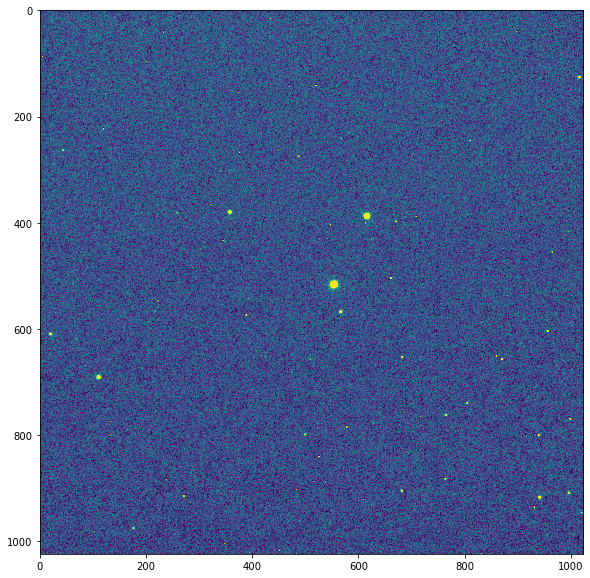

In [18]:
#TASK 16 
#Finding the dimensions and bixbox size required for image

array135 = np.array(scienceimages[0])
print(array135.shape)
plt.figure(1,(10,10))
plt.imshow(array135, vmin = 10, vmax= 90)
mean_135 = np.mean(array135)
std_135 = np.std(array135)
print(mean_135)
print(std_135)


29.543774239961596
19.905621168820453


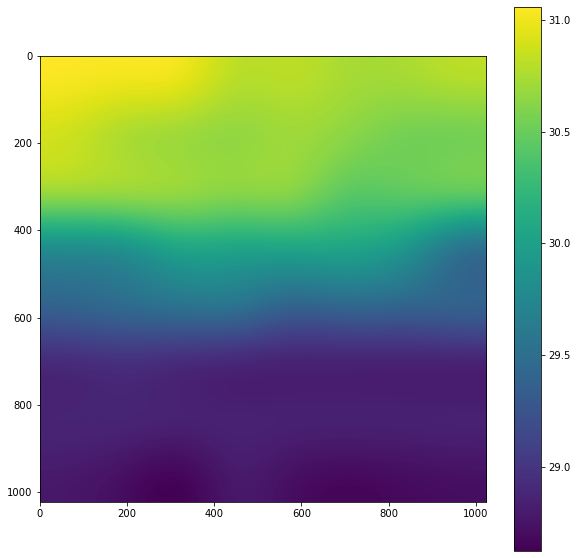

In [19]:
#QUESTION 18



from astropy.stats import SigmaClip
from photutils.background import Background2D, MedianBackground, StdBackgroundRMS
sigma_clip = SigmaClip(sigma=3.)
bkg_estimator = MedianBackground()
bkg = Background2D(array135, (128, 128), filter_size=(5,5), sigma_clip=sigma_clip, bkg_estimator=bkg_estimator)

print(bkg.background_median)  
print(bkg.background_rms_median)

bkg_median = bkg.background_median
bkg_rms = bkg.background_rms
bkg_rms_median = bkg.background_rms_median

plt.figure(1,(10,10))
plt.imshow(bkg.background)
plt.colorbar()
plt.savefig('352dbackground.pdf')

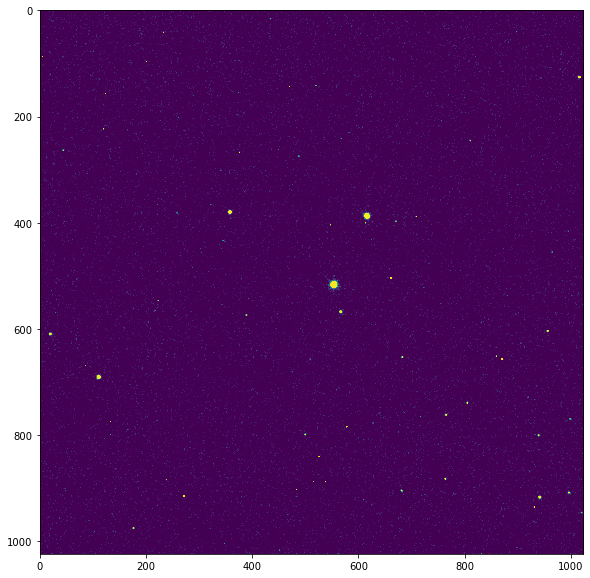

In [39]:
#QUESTION 19

plt.figure(1,(10,10))
plt.imshow(array135 - bkg.background, vmin = 10, vmax= 90)

In [21]:
print(bkg_rms)

[[20.1400969  20.14008974 20.14007543 ... 20.14292289 20.14296084
  20.14297981]
 [20.14010777 20.14010061 20.1400863  ... 20.14291829 20.14295624
  20.14297522]
 [20.14012951 20.14012235 20.14010803 ... 20.1429091  20.14294705
  20.14296603]
 ...
 [20.42821273 20.42820745 20.42819691 ... 20.69522384 20.69525389
  20.69526892]
 [20.4282419  20.42823662 20.42822607 ... 20.69521389 20.69524394
  20.69525896]
 [20.42825649 20.42825121 20.42824066 ... 20.69520892 20.69523896
  20.69525399]]


Text(0.5, 1.0, 'Segmentation Image')

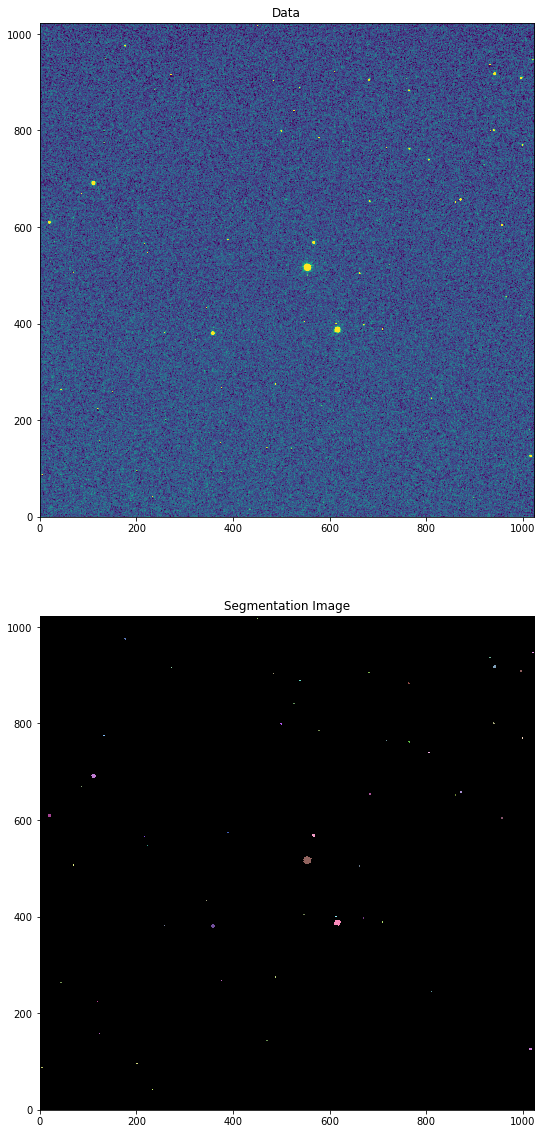

In [46]:
#QUESTION 20


from photutils.utils import calc_total_error

from photutils.segmentation import detect_threshold
threshold = detect_threshold(array135, nsigma=3.)

threshold = bkg.background + (2.0 * bkg_rms) 

from astropy.convolution import Gaussian2DKernel
from astropy.stats import gaussian_fwhm_to_sigma
from photutils.segmentation import detect_sources
sigma = 2.0 * gaussian_fwhm_to_sigma  # FWHM = 3.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
segm = detect_sources(array135, threshold, npixels=3, kernel=kernel)


from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
norm = ImageNormalize(stretch=SqrtStretch())
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 20))
ax1.imshow(array135, vmin=10, vmax=90, origin='lower')
ax1.set_title('Data')
cmap = segm.make_cmap(seed=123)
ax2.imshow(segm, origin='lower', cmap=cmap, interpolation='nearest')
ax2.set_title('Segmentation Image')

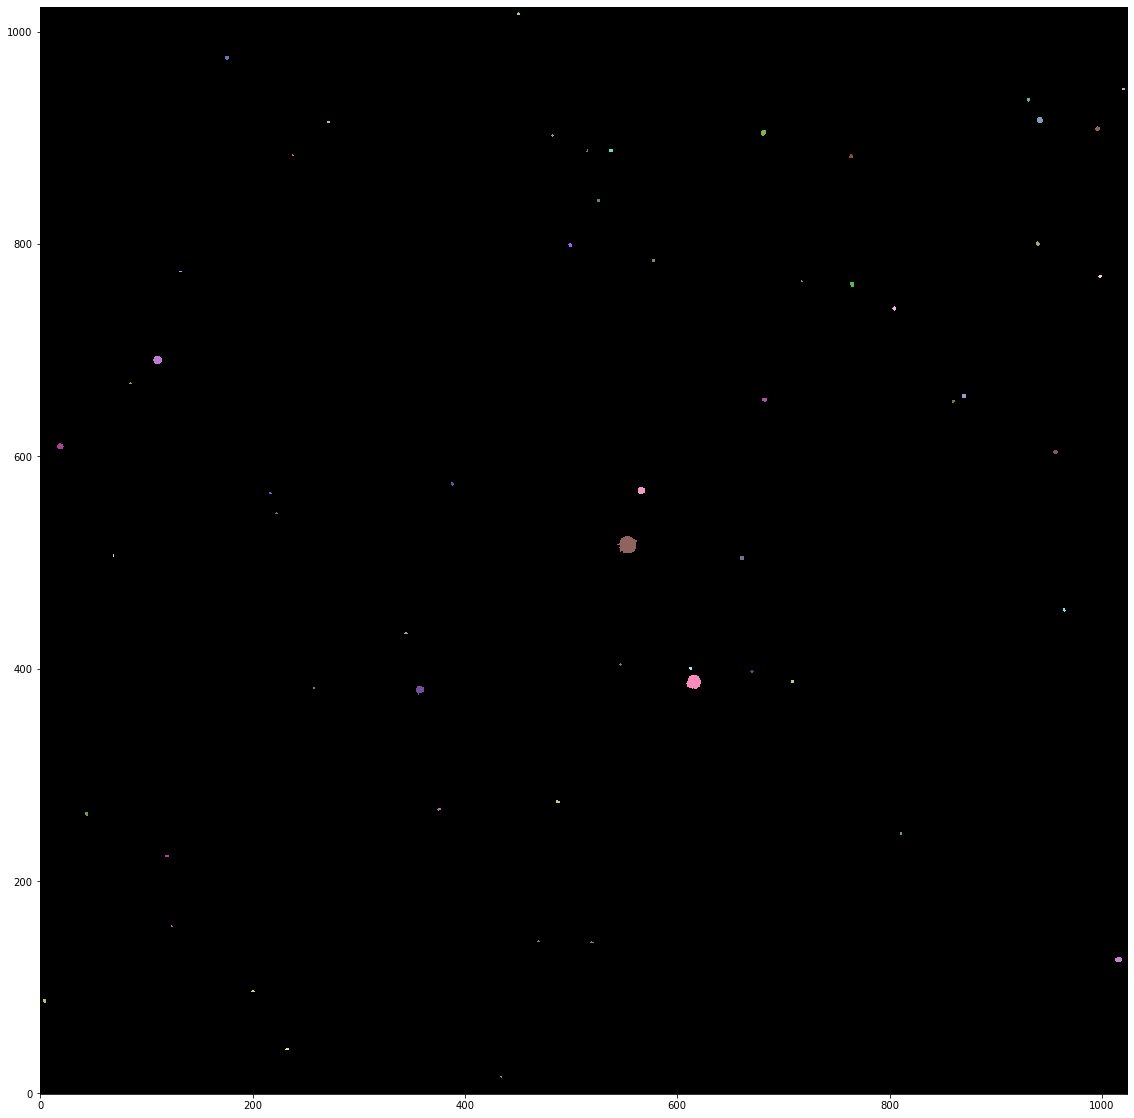

In [23]:
#QUESTION 21

from photutils.segmentation import deblend_sources
segm_deblend = deblend_sources(array135, segm, npixels=3, kernel=kernel,
                               nlevels=32, contrast=0.001)
plt.figure(1,(20,20))
plt.imshow(segm_deblend, origin='lower', cmap=cmap, interpolation='nearest')

In [24]:
from photutils.segmentation import source_properties
error = calc_total_error(array135, bkg_error = bkg_rms, effective_gain = 2.2)
table_thing = source_properties(array135 - bkg.background, segm_deblend, error)

tbl = table_thing.to_table()
tbl.show_in_notebook()

        Use `~photutils.segmentation.SourceCatalog` instead. [warnings]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]
        Use `~photutils.segmentation.SourceCatalog` instead. [photutils.segmentation.properties]


idx,id,xcentroid,ycentroid,sky_centroid,sky_centroid_icrs,source_sum,source_sum_err,background_sum,background_mean,background_at_centroid,bbox_xmin,bbox_xmax,bbox_ymin,bbox_ymax,min_value,max_value,minval_xpos,minval_ypos,maxval_xpos,maxval_ypos,area,equivalent_radius,perimeter,semimajor_axis_sigma,semiminor_axis_sigma,orientation,eccentricity,ellipticity,elongation,covar_sigx2,covar_sigxy,covar_sigy2,cxx,cxy,cyy,gini
,,pix,pix,,,,,,,,pix,pix,pix,pix,,,pix,pix,pix,pix,pix2,pix,pix,pix,pix,deg,,,,pix2,pix2,pix2,1 / pix2,1 / pix2,1 / pix2,
0,1,433.74874109733014,15.652386178189905,None,None,308.96319648803524,36.805855396026324,None,None,None,433.0,434.0,15.0,16.0,77.62975371496282,123.93356524320318,433.0,16.0,434.0,16.0,3.0,0.9772050238058398,3.414213562373095,0.5448914217992403,0.3435107824294393,-51.23819528145698,0.7762537308663476,0.3695793901560037,1.586242556770883,0.1881278664990087,-0.08734106742088829,0.22677845269667454,6.472932806252104,4.985948655341848,5.369729903133372,0.1498683728501414
1,2,232.04402657382641,41.02010883860267,None,None,667.7040033702817,48.56198594802231,None,None,None,231.0,233.0,41.0,42.0,-38.77772018142089,679.2518686718468,231.0,41.0,232.0,41.0,5.0,1.2615662610100802,5.207106781186548,0.3694236411017052,0.3032911932418549,29.89607346822138,0.5709500521114373,0.1790152023368844,1.2180493510311525,0.12542156795685871,0.019223515335361888,0.10303780654605096,8.207816461988628,-3.062625087158776,9.990868834194767,0.9689099710511984
2,3,4.053914836193391,86.9686328917155,None,None,894.9234201281007,61.46399437352024,None,None,None,3.0,5.0,86.0,88.0,-31.39344617894941,890.2980196266592,5.0,88.0,4.0,87.0,8.0,1.5957691216057308,7.414213562373095,0.44745335563158106,0.30485874836141025,-51.592910790629986,0.7319860525196229,0.3186803841685315,1.4677399222971448,0.13434135996496366,-0.05222368368837136,0.15881200195348416,8.534743178719658,5.61312397859565,7.219662188483239,0.9897103236495151
3,4,199.99730964397096,96.0,None,None,355.37420819970123,42.443105603983554,None,None,None,199.0,201.0,96.0,97.0,-12.951672794852488,343.9150191235187,200.0,97.0,200.0,96.0,4.0,1.1283791670955126,4.621320343559642,0.3867832330524285,0.28867513459481287,0.0,0.6655552030367184,0.25365137388030745,1.3398564223251201,0.14960126937048923,0.0,0.08333333333333333,6.684435260529032,-0.0,12.000000000000002,0.9322388849165536
4,5,1014.7217761513187,125.88884895930536,None,None,4390.310689928584,111.60178514766525,None,None,None,1012.0,1017.0,124.0,128.0,-36.631543100561466,696.2482635165303,1016.0,128.0,1015.0,126.0,25.0,2.8209479177387813,15.65685424949238,1.0873806057771886,0.893479794310609,-4.188721085169492,0.5699479100894662,0.17831917401910258,1.21701756738236,1.1803474152358244,-0.02797974641247659,0.8003553094258696,0.8479108520638062,0.05928449612747807,1.2504813434696378,0.5369307673199557
5,6,519.0031886051331,142.04926217571418,None,None,647.2558877448142,43.60999655575756,None,None,None,518.0,520.0,142.0,143.0,4.706347161454744,603.8941167016567,518.0,142.0,519.0,142.0,4.0,1.1283791670955126,4.621320343559642,0.3607902361852167,0.3178889524550618,-89.69089176910143,0.47294717297028505,0.11890921490494799,1.13495682501335,0.1010542335281398,-0.000157077626352296,0.1301687470914212,9.895695022440822,0.02388272638346183,7.682350011548131,0.938669638905758
6,7,469.077293344781,143.0,None,None,433.9659429531257,42.50192839712694,None,None,None,468.0,470.0,143.0,144.0,-25.38059886315111,432.99056373886515,468.0,143.0,469.0,143.0,4.0,1.1283791670955126,4.621320343559642,0.3932587150552416,0.28867513459481287,0.0,0.6790855999536108,0.2659409097792982,1.3622881499898607,0.15465241696689974,0.0,0.08333333333333333,6.466112975227733,-0.0,12.000000000000002,0.9595114493731005
7,8,123.0,157.05750340051466,None,None,327.5216146316325,37.28770102360712,None,None,None,123.0,124.0,157.0,158.0,-14.065266858284101,321.9444742330486,124.0,157.0,123.0,157.0,3.0,0.9772050238058398,3.414213562373095,0.3708504992274419,0.2886751345

In [25]:
tbl['source_sum', 'source_sum_err', 'ellipticity']

source_sum,source_sum_err,ellipticity
,,
float64,float64,float64
308.96319648803524,36.805855396026324,0.3695793901560037
667.7040033702817,48.56198594802231,0.1790152023368844
894.9234201281007,61.46399437352024,0.3186803841685315
355.37420819970123,42.443105603983554,0.25365137388030745
4390.310689928584,111.60178514766525,0.17831917401910258
647.2558877448142,43.60999655575756,0.11890921490494799
433.9659429531257,42.50192839712694,0.2659409097792982
327.5216146316325,37.28770102360712,0.22158623165889557


In [26]:
mag = -2.5*np.log10(tbl['source_sum'])
print(mag)
mag_err = 1.09*tbl['source_sum_err'] / tbl['source_sum'] 
print(mag_err)


     source_sum    
-------------------
 -6.224766874014357
  -7.06145995038006
 -7.379464684270991
 -6.376714762647523
 -9.106238137818922
 -7.027690024180768
 -6.593639120049177
 -6.288099915823249
 -8.017511665381306
 -6.785325580040109
                ...
 -6.455541658960238
 -7.182747064655935
 -6.756353894641181
 -7.985699200657676
 -8.136095867596353
 -9.689135715578402
  -9.43692650570657
 -8.093586186386778
-6.6365421795367805
 -7.815065513273792
 -6.493027122627214
Length = 58 rows
   source_sum_err   
--------------------
 0.12984841831548793
 0.07927549395565037
 0.07486199641255024
 0.13018104308330886
 0.02770782170155113
 0.07344065484116037
 0.10675285170447657
 0.12409438736262982
 0.03833489357667357
 0.10847638304368395
                 ...
 0.10769097831851945
 0.07785812048294202
 0.10418613412451624
0.058566764105881464
 0.05683126878952921
0.011204660963685031
 0.02339229781086444
  0.0391773323592896
 0.12905344879963526
 0.06619035842311653
 0.11931469910203471

In [27]:
tbl['source_sum', 'source_sum_err', 'ellipticity'][tbl['gini'] < 0.3]

source_sum,source_sum_err,ellipticity
,,
float64,float64,float64
308.96319648803524,36.805855396026324,0.3695793901560037
517.7620701404095,51.52748316150625,0.3663382160005876
666.599286552271,59.24874170208227,0.23298865227114984
313.42921646493073,41.90638978139152,0.031805874361204634
376.8127925172883,51.467280598590236,0.15012253460193226
798.7471008794251,63.15008035442805,0.20885143172623322
451.4574995034411,53.451511281998805,0.36698851039092484


In [28]:
mag_gini = -2.5*np.log10(tbl['source_sum'][tbl['gini'] < 0.3])
print(mag)
mag_err_gini = 1.09*tbl['source_sum_err'][tbl['gini'] < 0.3] / tbl['source_sum'][tbl['gini'] < 0.3]
print(mag_err)

     source_sum    
-------------------
 -6.224766874014357
  -7.06145995038006
 -7.379464684270991
 -6.376714762647523
 -9.106238137818922
 -7.027690024180768
 -6.593639120049177
 -6.288099915823249
 -8.017511665381306
 -6.785325580040109
                ...
 -6.455541658960238
 -7.182747064655935
 -6.756353894641181
 -7.985699200657676
 -8.136095867596353
 -9.689135715578402
  -9.43692650570657
 -8.093586186386778
-6.6365421795367805
 -7.815065513273792
 -6.493027122627214
Length = 58 rows
   source_sum_err   
--------------------
 0.12984841831548793
 0.07927549395565037
 0.07486199641255024
 0.13018104308330886
 0.02770782170155113
 0.07344065484116037
 0.10675285170447657
 0.12409438736262982
 0.03833489357667357
 0.10847638304368395
                 ...
 0.10769097831851945
 0.07785812048294202
 0.10418613412451624
0.058566764105881464
 0.05683126878952921
0.011204660963685031
 0.02339229781086444
  0.0391773323592896
 0.12905344879963526
 0.06619035842311653
 0.11931469910203471

<ErrorbarContainer object of 3 artists>

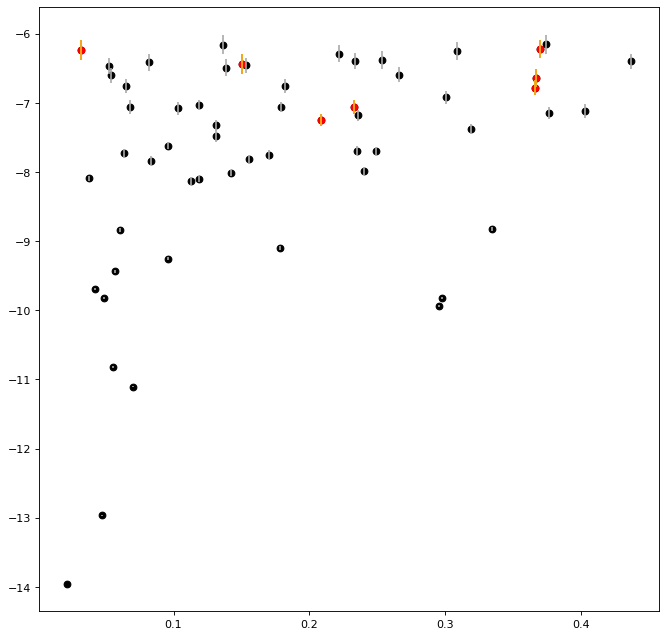

In [29]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

x = tbl['ellipticity']
y = mag
x_gini = tbl['ellipticity'][tbl['gini'] < 0.3]
y_gini = mag_gini

figure(figsize=(10, 10), dpi=80)
plt.scatter(x, y, c= 'black')
plt.scatter(x_gini, y_gini, c= 'red')
plt.errorbar(x, y, yerr = mag_err, fmt ='None', ecolor = 'darkgrey')
plt.errorbar(x_gini, y_gini, yerr = mag_err_gini, fmt ='None', ecolor = 'orange')

In [30]:
#TASK 26
#Measure flux of star HD7615 in multiple apertures

from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry

aper = []
radii = list(np.arange(start=1, stop=22, step=1))

for n in radii:
    aper.append(CircularAperture([552.5140264556778, 515.8910458792126], n))

phot_table = aperture_photometry(array135 - bkg.background, aper)
phot_table.show_in_notebook()


idx,id,xcenter,ycenter,aperture_sum_0,aperture_sum_1,aperture_sum_2,aperture_sum_3,aperture_sum_4,aperture_sum_5,aperture_sum_6,aperture_sum_7,aperture_sum_8,aperture_sum_9,aperture_sum_10,aperture_sum_11,aperture_sum_12,aperture_sum_13,aperture_sum_14,aperture_sum_15,aperture_sum_16,aperture_sum_17,aperture_sum_18,aperture_sum_19,aperture_sum_20
,,pix,pix,,,,,,,,,,,,,,,,,,,,,
0,1,552.5140264556778,515.8910458792126,149417.22304996743,293152.04773469846,339587.63244490663,358619.39765629877,369240.2706880927,375150.682791854,378595.79501948145,380858.3559962814,382535.0540808883,383890.9873304255,385116.96297029505,386063.8639099861,386892.0753854279,387527.3351740008,388235.02155283093,388699.5874994886,389162.5224480635,389466.2127333553,389932.2318187258,390325.79032904876,390631.18097432435


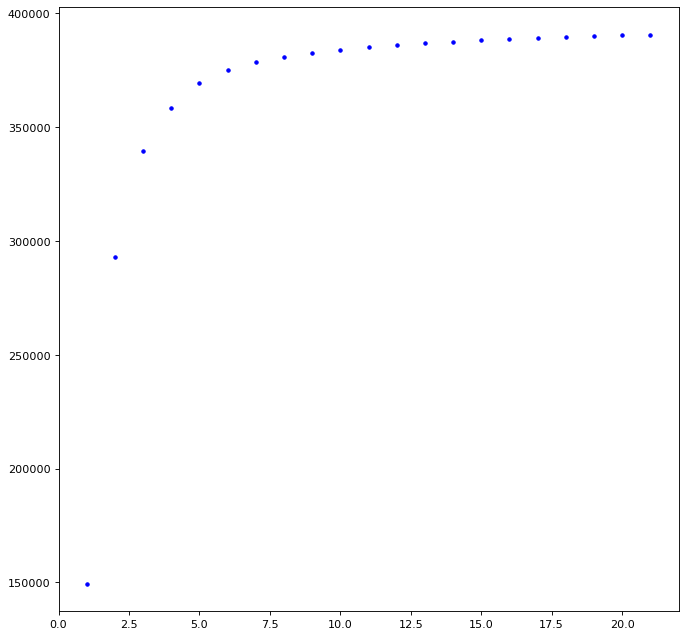

In [31]:
aperture_sum_str = 'aperture_sum_'
aperture_sum_names = []
for i in range(len(radii)):
    aperture_sum_names.append(aperture_sum_str + str(i))
    
flux = []
for f in aperture_sum_names:
    a = phot_table[f]
    flux.append(a)
    
figure(figsize=(10, 10), dpi=80)
plt.scatter(radii, flux, c='blue', marker = '.')

In [32]:
#Decide annulus cutoff width - workout where pixel to pixel increase is less
#than mean sky background plus one standard deviation

for i in range(1, len(radii)):
    annulus_area = np.pi*((i)**2 - (i-1)**2)
    diff = (flux[i] - flux [i-1])/annulus_area
    print(diff)
    print(bkg_median + bkg_rms_median)
    
    while diff > (bkg_median + bkg_rms_median):
        break
    else:
        print('cuttoff at', i, 'pixels')
        break

  aperture_sum_1 
-----------------
45752.21568604384
49.44939540878205
  aperture_sum_2 
-----------------
4926.968561328045
49.44939540878205
  aperture_sum_3  
------------------
1211.5998036629715
49.44939540878205
  aperture_sum_4 
-----------------
482.9612694175449
49.44939540878205
  aperture_sum_5  
------------------
209.03806711639666
49.44939540878205
  aperture_sum_6 
-----------------
99.69211646058832
49.44939540878205
  aperture_sum_7 
-----------------
55.39965592377468
49.44939540878205
  aperture_sum_8 
-----------------
35.58063843172027
49.44939540878205
cuttoff at 8 pixels


In [33]:
#Task 29

mag = -2.5*np.log10(flux[7]) #at radius of 10pix
print(mag)
zeropoint = 6.635-mag
print(zeropoint)

   aperture_sum_7  
-------------------
-13.951908721034393
  aperture_sum_7 
-----------------
20.58690872103439


In [128]:
ap = CircularAperture(np.column_stack((tbl['xcentroid'], tbl['ycentroid'])), 8)

aperture_table = aperture_photometry(array135 - bkg.background, ap, error)
aperture_table.show_in_notebook()

idx,id,xcenter,ycenter,aperture_sum,aperture_sum_err
,,pix,pix,,
0,1,433.74874109733014,15.652386178189905,744.5040831370966,285.91878909444017
1,2,232.04402657382641,41.02010883860267,440.64431254801514,287.9555391526737
2,3,4.053914836193391,86.9686328917155,496.66812704900394,267.8353745486925
3,4,199.99730964397096,96.0,188.24996431153227,287.4601545665607
4,5,1014.7217761513187,125.88884895930536,5069.70078405174,293.9979099696537
5,6,519.0031886051331,142.04926217571418,706.414346720997,285.0682961262247
6,7,469.077293344781,143.0,44.43807564371917,284.65613291945624
7,8,123.0,157.05750340051466,359.88796777871596,288.98022902846395
8,9,119.01779454429479,223.04224038286372,796.0900733525621,289.58768703949227


C:\Users\aip981\AppData\Local\Temp/ipykernel_612/2702438013.py:3: RuntimeWarning: invalid value encountered in log10
  magnitude = -2.5*np.log10(aperture_table['aperture_sum']) + zeropoint


(0.0, 18.0)

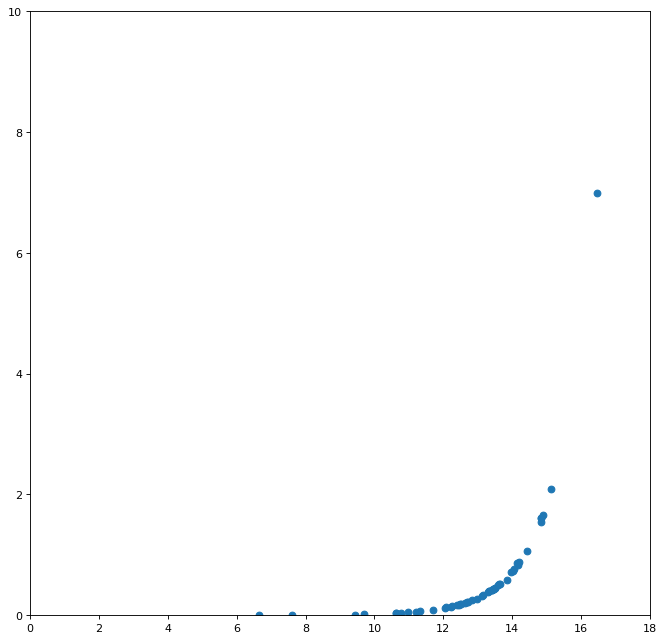

In [129]:
#Task 30

magnitude = -2.5*np.log10(aperture_table['aperture_sum']) + zeropoint
magnitude1 = magnitude[~np.isnan(magnitude)]
magnitude_error = 1.09*(aperture_table['aperture_sum_err'] / aperture_table['aperture_sum'])
magnitude_error = magnitude_error[~np.isnan(magnitude)]
figure(figsize=(10, 10), dpi=80)
plt.scatter(magnitude1, magnitude_error)
plt.ylim(0, 10)
plt.xlim(0, 18)

(0.0, 16.0)

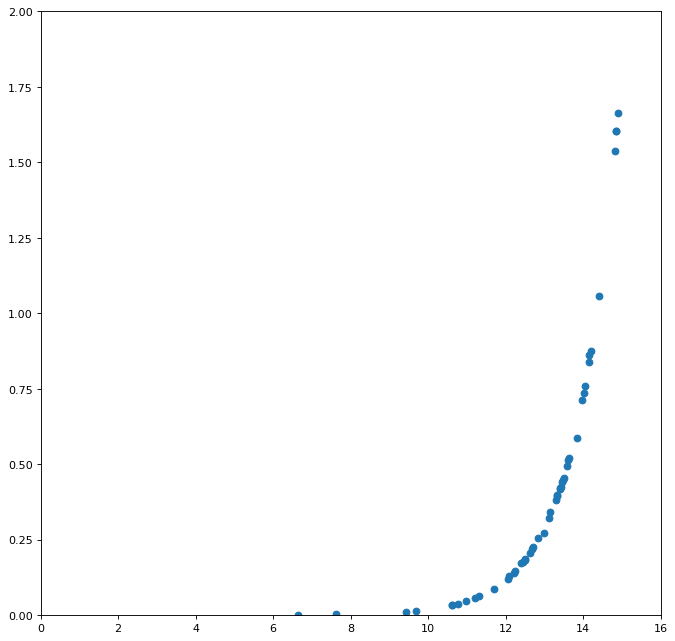

In [130]:
figure(figsize=(10, 10), dpi=80)
plt.scatter(magnitude1, magnitude_error)
plt.ylim(0, 2)
plt.xlim(0, 16)

(0.0, 10.0)

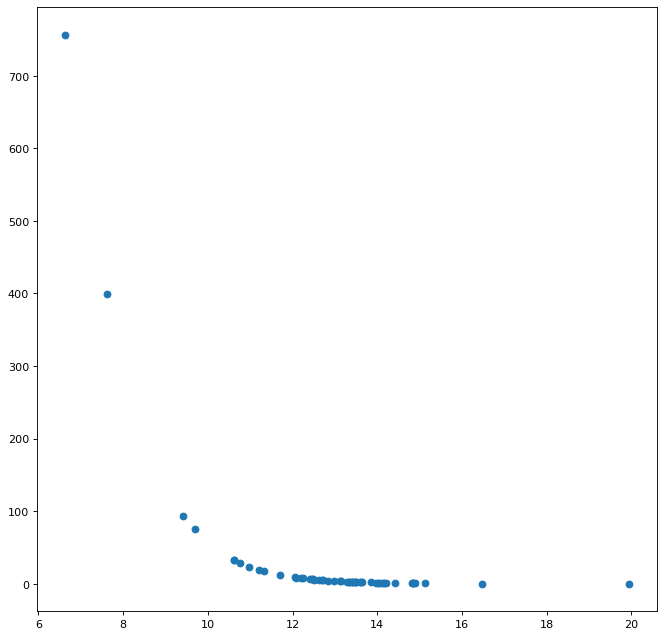

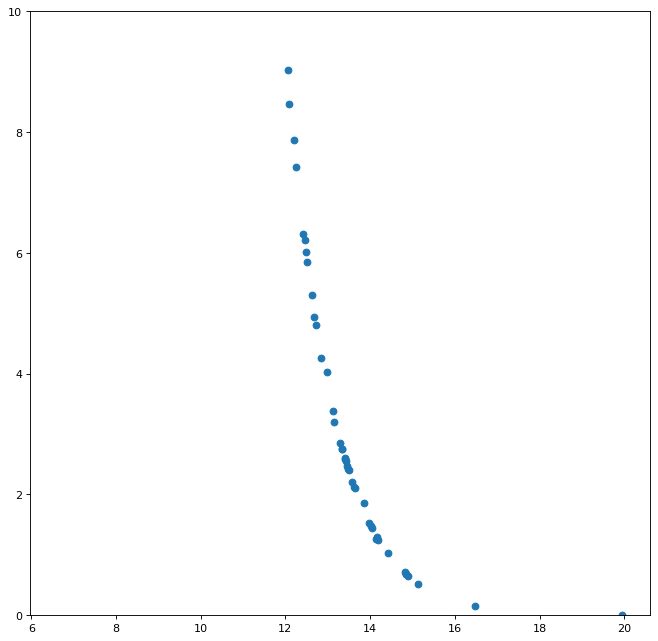

In [131]:
figure(figsize=(10, 10), dpi=80)
snr = aperture_table['aperture_sum']/aperture_table['aperture_sum_err']
snr = snr[~np.isnan(magnitude)]

plt.scatter(magnitude1, snr)

figure(figsize=(10, 10), dpi=80)
plt.scatter(magnitude1, snr)
plt.ylim(0,10)

3.318863467239626 - 19.883586793618296 x**1 + 22.45145590039253 x**2 -
75.44420055419023 x**3 + 352.4433157460002 x**4 - 282.96616815511 x**5


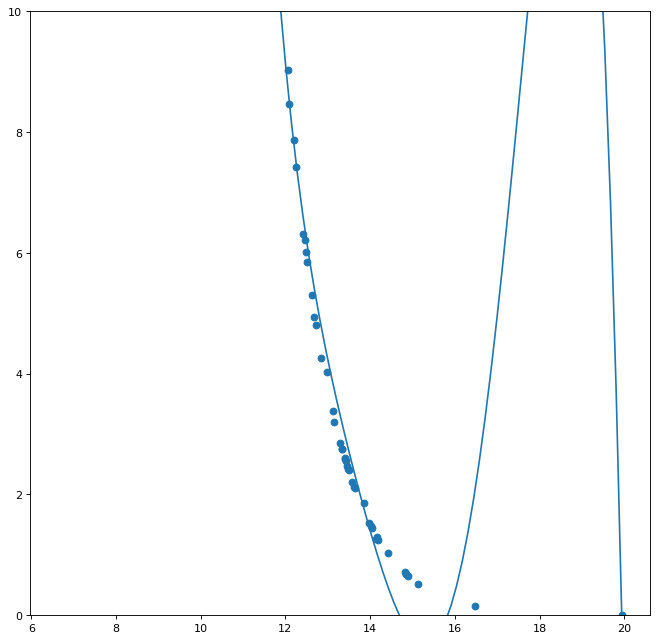

In [136]:
fit1 = np.polynomial.polynomial.Polynomial.fit(magnitude1, snr, 5)
print(fit1)

figure(figsize=(10, 10), dpi=80)
plt.scatter(magnitude1, snr)
plt.ylim(0,10)
fitpoints1 = fit1.linspace(100)
plt.plot(fitpoints1[0], fitpoints1[1])

2.4419587671200627 - 3.123823520639501 x**1 + 1.9358114640779052 x**2 -
0.9834836262720521 x**3 + 0.387615403057714 x**4 +
0.00023715710589633027 x**5


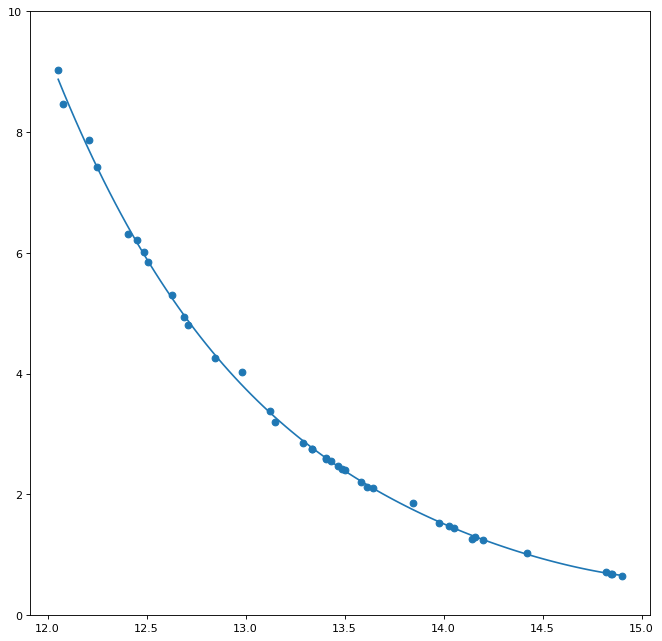

In [138]:
snr1 = snr[magnitude1 >= 12]
magnitude2 = magnitude1[magnitude1 >= 12]
snr2 = snr1[magnitude2 <= 15]
magnitude3 = magnitude2[magnitude2 <= 15]
#print(magnitude2)

fit2 = np.polynomial.polynomial.Polynomial.fit(magnitude3, snr2, 5)
print(fit2)

figure(figsize=(10, 10), dpi=80)
plt.scatter(magnitude3, snr2)
plt.ylim(0,10)
fitpoints2 = fit2.linspace(100)
plt.plot(fitpoints2[0], fitpoints2[1])